In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as  sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LS
from sklearn.metrics import mean_squared_error as mse

In [76]:
data=pd.read_csv("D:/data analysis class/data.csv")

In [77]:
data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [78]:
data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [79]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [82]:
data.horsepower.replace('?',92,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

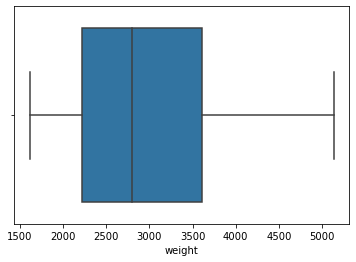

In [83]:
sns.boxplot(data.weight)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acceleration'>

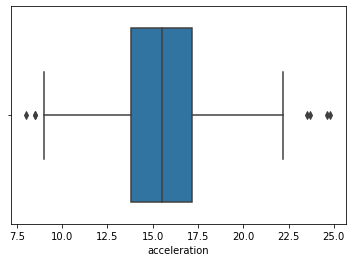

In [84]:
sns.boxplot(data.acceleration)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='displacement'>

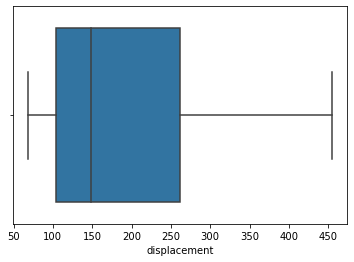

In [85]:
sns.boxplot(data.displacement)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer_per_liter'>

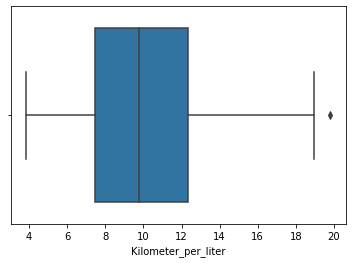

In [86]:
sns.boxplot(data.Kilometer_per_liter)

In [87]:
Y=data.Kilometer_per_liter

In [88]:
data.drop(['Kilometer_per_liter'],axis=1,inplace=True)

In [89]:
X=data.drop('name',axis=1)

In [90]:
model=LS()

In [95]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=100)

In [99]:
model_train=model.fit(train_x,train_y)

In [100]:
model_train.score(train_x,train_y)

0.8166765709789923

In [101]:
predicted_y=model.predict(test_x)

In [102]:
predicted_y=pd.DataFrame(predicted_y)

In [103]:
model_train.score(test_x,predicted_y)

1.0

In [106]:
mse(test_y,predicted_y)

1.6564833490583044

In [107]:
data_y=pd.concat([train_y,predicted_y],ignore_index=True)

In [108]:
data_x=pd.concat([train_x,test_x],ignore_index=True)

In [109]:
model=LS().fit(data_x,data_y)

In [111]:
predicted_yt=model.predict(X)

In [113]:
model.score(X,predicted_yt)

1.0

In [115]:
mse(Y,predicted_yt,squared=False)

1.4054424587846412